In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../../data/raw/Video_game_sales_db.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [35]:
dfGR = df[["Rank","Name","Genre","Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]

In [52]:
dfGR_Clean = (
dfGR
    .dropna(axis=0) #Drop the rows which have missing values
    .reset_index(drop = True)
    .sort_values(by = 'Year', ascending=True)
)
dfGR_Clean

,Rank,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6791,6898,Checkers,Misc,1980.0,0.22,0.01,0.00,0.00
2633,2671,Boxing,Fighting,1980.0,0.72,0.04,0.00,0.01
5289,5368,Freeway,Action,1980.0,0.32,0.02,0.00,0.00
1949,1971,Defender,Misc,1980.0,0.99,0.05,0.00,0.01
1747,1768,Kaboom!,Misc,1980.0,1.07,0.07,0.00,0.01
...,...,...,...,...,...,...,...,...
4754,4822,EA Sports UFC 2,Sports,2016.0,0.23,0.14,0.00,0.04
15976,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,Role-Playing,2017.0,0.00,0.00,0.01,0.00
16168,16441,Brothers Conflict: Precious Baby,Action,2017.0,0.00,0.00,0.01,0.00
14162,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,Role-Playing,2017.0,0.00,0.00,0.03,0.00


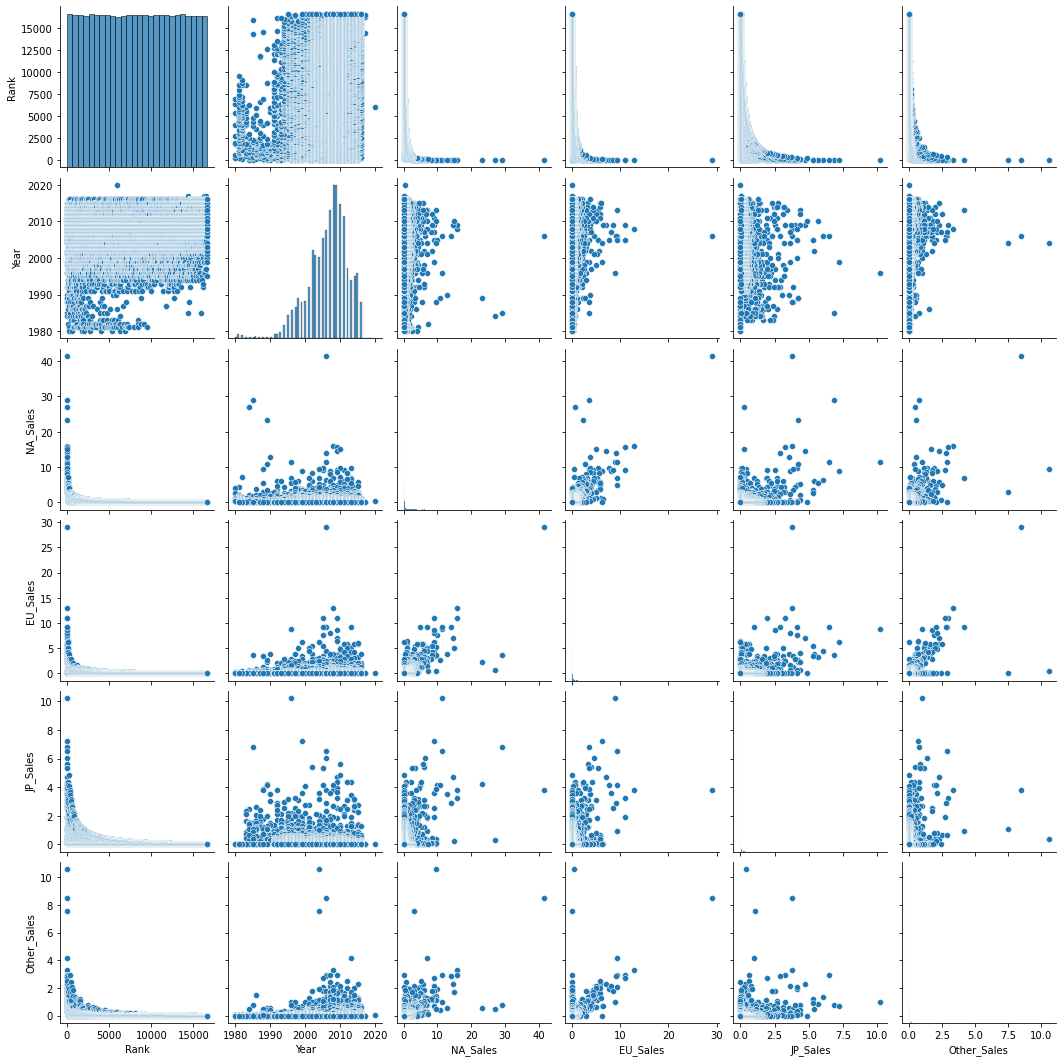

In [37]:
sns.pairplot(dfGR_Clean)

In [38]:
#This is to only find new games which are ranked high
dfGR_BN = (
dfGR_Clean
    .loc[lambda x: x["Year"] >= 2000] # Filter for games in this century
    .loc[lambda x: x["Rank"] <= 2500] # Only looking for games ranked 2500 or less
    .reset_index(drop = True)
)

In [39]:
# Sorting Sales by region
dfGR_NA = (dfGR_BN[["Rank","Genre","Year","NA_Sales"]])
dfGR_EU = (dfGR_Clean[["Rank","Genre","Year","EU_Sales"]])
dfGR_JP = (dfGR_Clean[["Rank","Genre","Year","JP_Sales"]])
dfGR_Other = (dfGR_Clean[["Rank","Genre","Year","Other_Sales"]])
dfGR_Clean.Genre.unique() #To check unique Types of Genres in the Dataframe

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [40]:
P1 = (
   dfGR_NA[['Genre','NA_Sales']]
    .groupby('Genre').sum('NA_Sales')
)
P2 = (
   dfGR_EU[['Genre','EU_Sales']]
    .groupby('Genre').sum('EU_Sales')
)
P3 = (
   dfGR_JP[['Genre','JP_Sales']]
    .groupby('Genre').sum('JP_Sales')
)
P4 = (
   dfGR_Other[['Genre','Other_Sales']]
    .groupby('Genre').sum('Other_Sales')
)
SbG = P1
SbG['EU_SALES']= P2['EU_Sales']
SbG['JP_SALES']= P3['JP_Sales']
SbG['OTHER_SALES']= P4['Other_Sales']
SbG


,NA_Sales,EU_SALES,JP_SALES,OTHER_SALES
Genre,,,,
Action,477.42,516.48,158.66,184.92
Adventure,28.91,63.79,52.01,16.70
Fighting,101.75,100.00,87.15,36.19
Misc,221.72,213.82,106.67,74.02
Platform,182.20,200.67,130.65,51.51
Puzzle,30.91,50.53,56.68,12.47
Racing,177.14,236.32,56.61,76.68
Role-Playing,202.50,187.58,350.29,59.38
Shooter,381.63,310.45,38.18,101.90


<AxesSubplot:ylabel='Genre'>

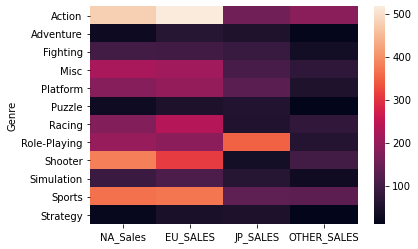

In [41]:
sns.heatmap(SbG)

<Figure size 3600x2160 with 0 Axes>

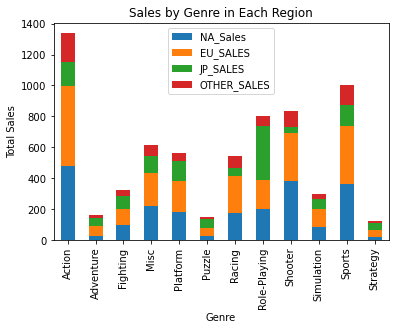

<Figure size 3600x2160 with 0 Axes>

In [42]:
SbG.plot(kind='bar', stacked=True)
plt.ylabel('Total Sales in millions')
plt.title('Sales by Genre in Each Region')
plt.figure(figsize=(50,30))


In [43]:
dfGR_old = (
 dfGR_Clean
    .loc[lambda x: x["Year"] <= 1999] # Filter for 1980-1999
    .sort_values(by = 'Year', ascending=True)
)
dfGR_new = (
 dfGR_Clean
    .loc[lambda x: x["Year"] >= 2000] # Filter for 2000-latest
    .sort_values(by = 'Year', ascending=True)
)

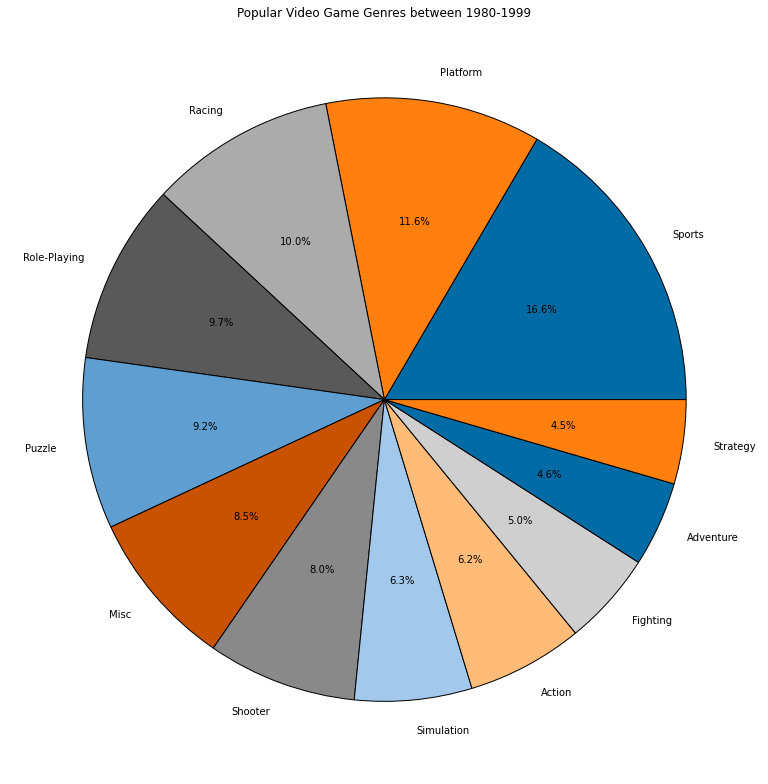

In [44]:
labels = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']
plt.style.use('tableau-colorblind10')
fig = plt.figure(figsize=(11,11))
plt.pie(list(dfGR_old['Genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Popular Video Game Genres between 1980-1999')
plt.tight_layout()
plt.show()

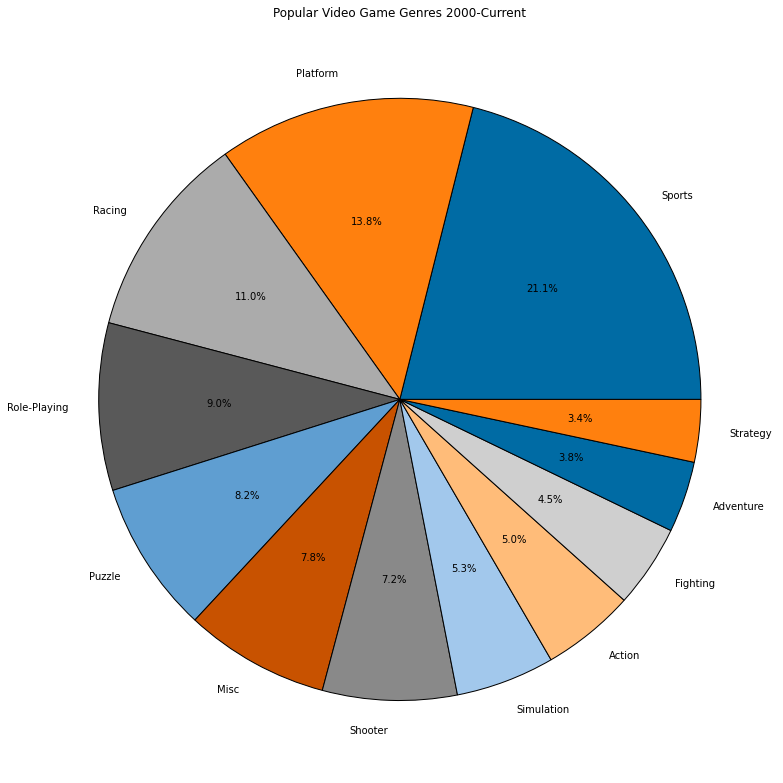

In [45]:
labels = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']
plt.style.use('tableau-colorblind10')
fig = plt.figure(figsize=(11,11))
plt.pie(list(dfGR_new['Genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Popular Video Game Genres 2000-Current')
plt.tight_layout()
plt.show()

In [46]:
# Games released vs Publishers
dfp = dfGR_Clean[['Rank','Genre','Year']]
dfp

,Rank,Genre,Year
0,1,Sports,2006.0
1,2,Platform,1985.0
2,3,Racing,2008.0
3,4,Sports,2009.0
4,5,Role-Playing,1996.0
...,...,...,...
16322,16596,Platform,2002.0
16323,16597,Shooter,2003.0
16324,16598,Racing,2008.0
16325,16599,Puzzle,2010.0


In [47]:
dfp_Clean = (
dfp
    .loc[lambda x: x["Year"] >= 2000] # Filter for games in this century
    .loc[lambda x: x["Rank"] <= 100] #Best 100 over this last century so far
    .dropna(axis = 0)
    .reset_index(drop = True)
    .sort_values(by = 'Year', ascending=True)
)
dfp_Clean


,Rank,Genre,Year
0,1,Sports,2006.0
1,3,Racing,2008.0
2,4,Sports,2009.0
3,7,Platform,2006.0
4,8,Misc,2006.0
...,...,...,...
71,93,Shooter,2015.0
72,94,Shooter,2014.0
73,98,Fighting,2014.0
74,99,Shooter,2008.0


In [20]:
dfp_Clean.Genre.unique() #To check the unique genres

array(['Sports', 'Racing', 'Platform', 'Misc', 'Simulation', 'Action',
       'Role-Playing', 'Puzzle', 'Shooter', 'Fighting'], dtype=object)

([<matplotlib.axis.XTick at 0x16fcf8971c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

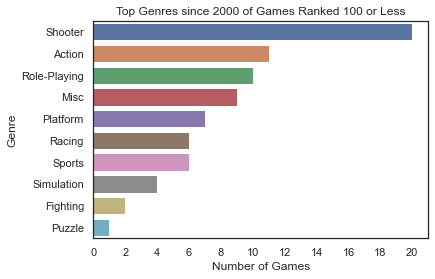

In [28]:
sns.set_theme(style="white")
publishx = sns.countplot(data = dfp_Clean,y="Genre" ,order = ['Shooter','Action','Role-Playing','Misc','Platform','Racing','Sports','Simulation','Fighting','Puzzle'])
plt.xlabel('Number of Games')
plt.title('Top Genres since 2000 of Games Ranked 100 or Less')
plt.xticks(np.arange(0, 21, step=2))

In [3]:
def sales_by_region(filepath):
    import pandas as pd
    import numpy as np
    df = pd.read_csv(filepath)
    
    dfGR = df[["Rank","Name","Genre","Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
    
    dfGR_Clean = (
      dfGR
    .dropna(axis=0) #Drop the rows which have missing values
    .reset_index(drop = True)
    )
    dfGR_BN = (
        dfGR_Clean
    .loc[lambda x: x["Year"] >= 2000] # Filter for games in this century
    .loc[lambda x: x["Rank"] <= 2500] # Only looking for games ranked 2500 or less
    .reset_index(drop = True)
    )
    
    dfGR_NA = (dfGR_BN[["Rank","Genre","Year","NA_Sales"]])
    dfGR_EU = (dfGR_Clean[["Rank","Genre","Year","EU_Sales"]])
    dfGR_JP = (dfGR_Clean[["Rank","Genre","Year","JP_Sales"]])
    dfGR_Other = (dfGR_Clean[["Rank","Genre","Year","Other_Sales"]])
    
    P1 = (
   dfGR_NA[['Genre','NA_Sales']]
    .groupby('Genre').sum('NA_Sales')
    )
    P2 = (
   dfGR_EU[['Genre','EU_Sales']]
    .groupby('Genre').sum('EU_Sales')
    )
    P3 = (
   dfGR_JP[['Genre','JP_Sales']]
    .groupby('Genre').sum('JP_Sales')
    )
    P4 = (
   dfGR_Other[['Genre','Other_Sales']]
    .groupby('Genre').sum('Other_Sales')
    )
    SbG = P1
    SbG['EU_SALES']= P2['EU_Sales']
    SbG['JP_SALES']= P3['JP_Sales']
    SbG['OTHER_SALES']= P4['Other_Sales']
    
    return SbG
    
    
    
    


In [26]:
def genre_popularity_old(filepath):
    import pandas as pd
    df = pd.read_csv(filepath)
    
    dfGR = df[["Rank","Name","Genre","Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
    
    dfGR_Clean = (
      dfGR
    .dropna(axis=0) #Drop the rows which have missing values
    .reset_index(drop = True)
    )
    dfGR_old = (
    dfGR_Clean
    .loc[lambda x: x["Year"] <= 1999] # Filter for 1980-1999
    .sort_values(by = 'Year' , ascending = True)
    )
    
    return dfGR_old 
    


In [27]:
def genre_popularity_new(filepath):
    import pandas as pd
    import numpy as np
    df = pd.read_csv(filepath)
    
    dfGR = df[["Rank","Name","Genre","Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
    
    dfGR_Clean = (
      dfGR
    .dropna(axis=0) #Drop the rows which have missing values
    .reset_index(drop = True)
    )
        
    dfGR_new = (
    dfGR_Clean
    .loc[lambda x: x["Year"] >= 2000] # Filter for 2000-latest
    .sort_values(by = 'Year' , ascending = True)
    )
    return dfGR_new

In [50]:
def top_genre_best(filepath):
    import pandas as pd
    import numpy as np
    
    dfGR = df[["Rank","Name","Genre","Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
    
    dfGR_Clean = (
      dfGR
    .dropna(axis=0) #Drop the rows which have missing values
    .reset_index(drop = True)
    )
    dfp = dfGR_Clean[['Rank','Genre','Year']]
    
    dfp_Clean = (
    dfp
    .loc[lambda x: x["Year"] >= 2000] # Filter for games in this century
    .loc[lambda x: x["Rank"] <= 100] #Best 100 over this last century so far
    .dropna(axis = 0)
    .reset_index(drop = True)
    .sort_values(by = 'Year',ascending = True)
    )
    
    return dfp_Clean
    


In [51]:
top_genre_best("../../data/raw/Video_game_sales_db.csv")

,Rank,Genre,Year
67,87,Role-Playing,2001.0
29,39,Action,2001.0
20,29,Racing,2001.0
17,26,Role-Playing,2002.0
16,25,Action,2002.0
...,...,...,...
73,98,Fighting,2014.0
39,50,Role-Playing,2014.0
59,78,Sports,2015.0
24,34,Shooter,2015.0
